# Neural network classification with *Keras* on Loan Repayment data 

Prediction of the loan behaviour class of a loan ID (good or bad) based on a set of input features using **Random Forest**.

- Up to **6** preprocessed input features available per loan ID 

**Tasks**:
- Preprocess the data for suitable input features
- Preparing the data for Deep Learning with Keras
- Creating a training and testing sample 
- Running the deep learning process and evaluate predictive power  
- Investigating prediction accuracy changes with layers and nodes tuning
- Saved the trained models

#### Import required package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import dt_utils

Using TensorFlow backend.


#### Configure display output setting

In [2]:
#Widen the output display to see more columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Data Extraction
- The features can be any of the following: 
  - <font color='blue'>APR</font> - The APR percentage of the loan
  - <font color='blue'>loanAmount</font> - Principal of the loan
  - <font color='blue'>originallyScheduledPaymentAmount</font> - The amount of MoneyLion should received from applicant
  - <font color='blue'>loanStatus</font> - The current loan status of the applicant
  - <font color='blue'>leadCost</font> - The cost for the underwriting rules for the lead
  - <font color='blue'>topPaymentStatus</font> - The most frequent payment status of applicant for among all payment attempt made.
- The target is <font color='red'>badLoanBehaviour</font>.

In [3]:
payment = 'data/payment_processed.csv'
loan = 'data/loan.csv'

In [4]:
df, label    = dt_utils.preprocess(payment, loan)
feature      = df.dtypes.index[:-1]

In [5]:
df

,apr,loanAmount,originallyScheduledPaymentAmount,loanStatus,leadCost,topPS,badLoanBehaviour
0,478.6700,800.0,2035.32,0,25,0,0
1,478.6700,800.0,1919.28,1,6,1,1
2,478.6700,800.0,1919.28,1,25,0,1
3,705.5900,200.0,739.08,1,25,1,1
4,478.6700,500.0,1199.55,1,25,1,1
5,478.6700,700.0,1679.37,1,25,1,1
6,478.6700,800.0,2035.32,1,25,1,1
7,478.6700,500.0,1272.00,2,25,0,0
8,478.6700,500.0,1199.55,1,25,1,1
9,442.8900,1000.0,2408.88,1,25,1,1


In [6]:
data, target = df.values[:, 0:-1].astype(float), df.values[:, [-1]].ravel()

#preprocess target data
le = preprocessing.LabelEncoder()
target_label_1d = le.fit_transform(target)

# # convert integers to dummy variables (i.e. one hot encoded)
target_label = np_utils.to_categorical(target_label_1d).astype(float)

# # # Show dataset dimensions
data.shape, target.shape, np.unique(target)

((39952, 6), (39952,), array([0.0, 1.0], dtype=object))

#### The feature distribution of the selected observations

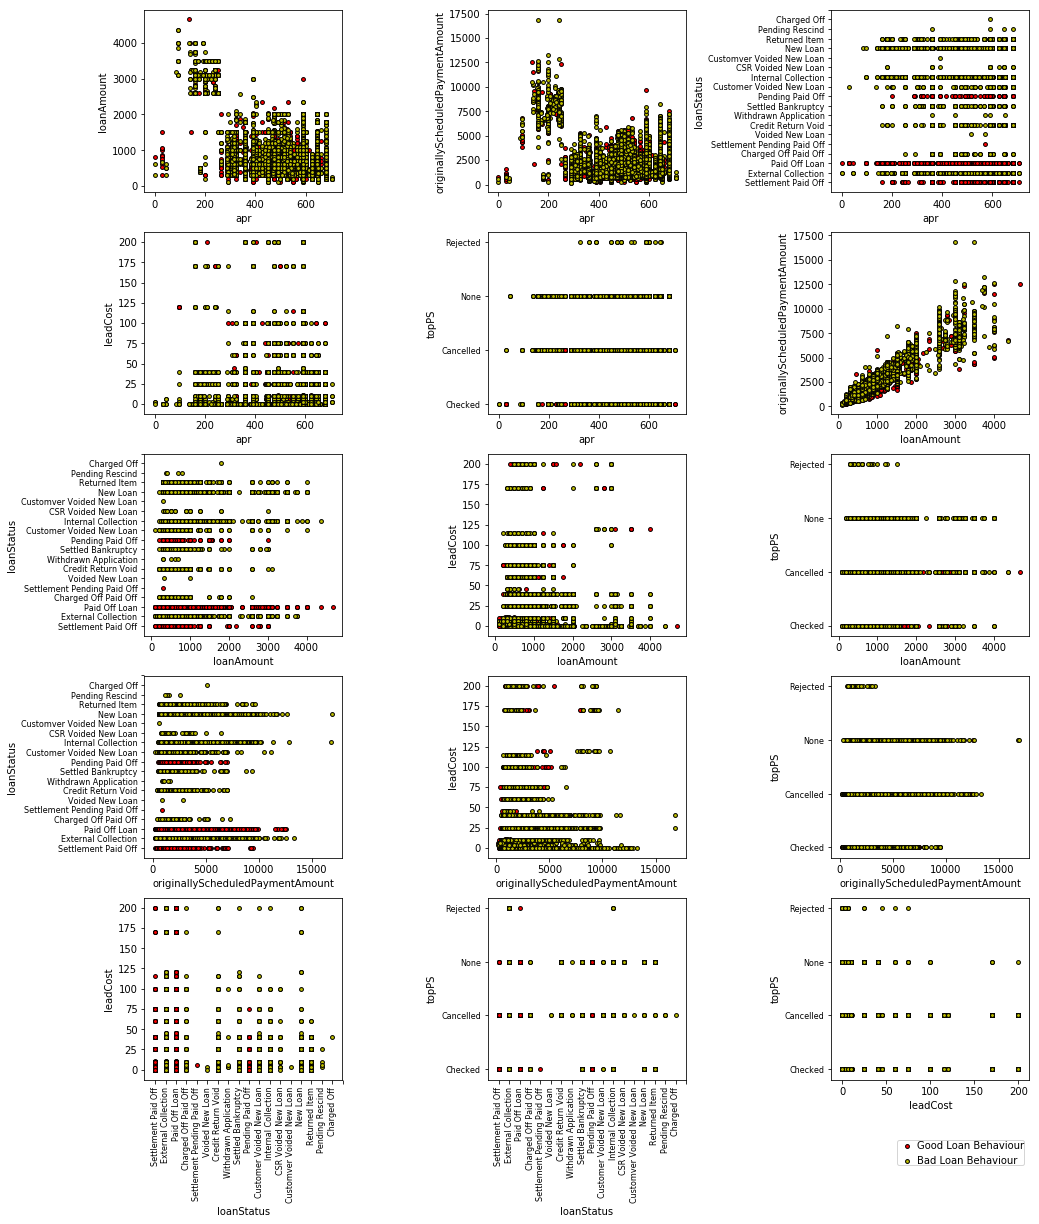

In [7]:
# generate 2D plots 
dt_utils.featuresplot(data, target, label, feature, label['badLoanBehaviour'])
plt.show()

#### Constructing and training the Deep Learning based on your training data with the following requirements
- 70% of the observations are reserved for training

In [8]:
# split data into training and test dataset
d = model_selection.train_test_split(
    data, target_label, test_size=0.3, random_state=0)

# get training and test data and targets
train_data, test_data, train_target, test_target = d

print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(27966, 6) (27966, 2) (11986, 6) (11986, 2)


In [9]:
# Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale both the training inputs and outputs
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [10]:
def baseline_model():
    # Define the model
    model = Sequential()
    model.add(Dense(8, kernel_initializer='uniform', input_dim=6, activation='relu'))
    model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    return model
model = baseline_model()

#### Creating Tensorboard logger to visualize and compare models performance
- To access the TensorBoard, run 'tensorboard --logdir=logs --host localhost' inside the file directory through terminal.


In [11]:
RUN_NAME = 'run 1 epoch 10 nodes 8 relu,2 softmax, categorical_crossentropy'

# Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True
)

In [12]:
%%time
# Train the model
model.fit(
    train_data,
    train_target,
    epochs=10,
    shuffle=True,
    verbose=0,
    callbacks=[logger],
    validation_data=(test_data, test_target)
)

Wall time: 35 s


#### Displaying the binary cross-entropy and accuracy for the predictions using the test sample

In [13]:
test_error_rate = model.evaluate(test_data, test_target, verbose=0)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

The categorical cross-entropy (CCE) for the test data set is: 0.4152
The accuracy of the test data set evaluation is: 82.01%


#### Evaluating the performance of the model by running manual k-Fold Cross Validation.
- This must be done manually because the data must be preprocessed(rescaling) before being used to train the model.

In [14]:
model_acc = dt_utils.evaluate_model_accuracy(model, data, target_label_1d, epochs=10, shuffle=True, verbose=0)

k-Fold Cross Validation
Parameters
{'epochs': 10, 'shuffle': True, 'verbose': 0}


acc : 82.73%
acc : 82.98%
acc : 81.53%
acc : 81.65%
acc : 82.05%
acc : 81.93%
acc : 82.30%
acc : 81.13%
acc : 82.65%
acc : 81.95%

Model Accuracy : 82.09% (+/- 0.55%)


#### Saving the trained model for future use.

In [15]:
# Save the model to disk
model.save("{0:} - modelACC{1:0.2f}.h5".format(RUN_NAME, model_acc))
print('Model saved to disk.')

Model saved to disk.


Parameters
{'epochs': 10, 'shuffle': True, 'verbose': 0}
Split sample:
[0.01       0.11888889 0.22777778 0.33666667 0.44555556 0.55444444
 0.66333333 0.77222222 0.88111111 0.99      ]


Running with test size of: 0.01
Running with test size of: 0.12
Running with test size of: 0.23
Running with test size of: 0.34
Running with test size of: 0.45
Running with test size of: 0.55
Running with test size of: 0.66
Running with test size of: 0.77
Running with test size of: 0.88
Running with test size of: 0.99



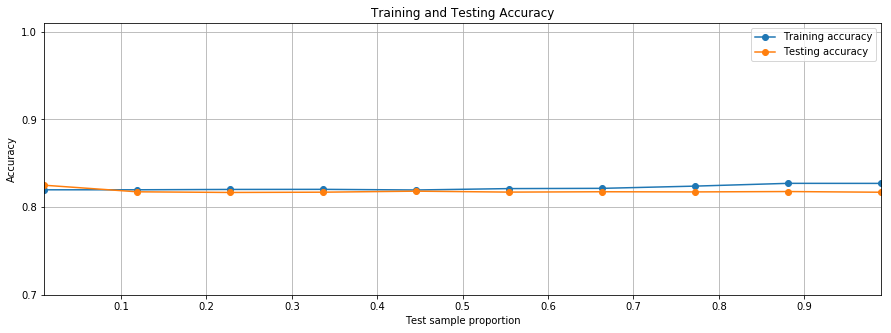

In [16]:
splitter = np.linspace(0.01, 0.99, 10)
dt_utils.compare_traintest(data, target, model, split=splitter, epochs=10, shuffle=True, verbose=0)